# Business Problem

### How HR can help to prevent loss of good people to oragnization
The key to success in any organization is attracting and retaining top talent.

Employee churn can be defined as a leak or departure of an intellectual asset from a company or organization. Alternatively, in simple words, you can say, when employees leave the organization is known as churn. Another definition can be when a member of a population leaves a population, is known as churn.

In Research, it was found that employee churn will be affected by age, tenure, pay, job satisfaction, salary, working conditions, growth potential and employee’s perceptions of fairness. Some other variables such as age, gender, ethnicity, education, and marital status, were essential factors in the prediction of employee churn. In some cases such as the employee with niche skills are harder to replace.

It affects the ongoing work and productivity of existing employees.

Acquiring new employees as a replacement has its costs such as hiring costs and training costs. Also, the new employee will take time to learn skills at the similar level of technical or business expertise knowledge of an older employee. Organizations tackle this problem by applying machine learning techniques to predict employee churn, which helps them in taking necessary actions.

You are an HR analyst at GooDHire company, and one of my tasks is to determine which factors keep employees at my company and which prompt others to leave.

You need to know what factors I can change to prevent the loss of good people.

## What data we have?
Data has various data points on our employees, but you are most interested in whether they’re still with my company or whether they’ve gone to work somewhere else.

And you want to understand how this relates to workforce attrition.

**Education :** 1 ``'Below College'`` , 2 ``'College'`` , 3 ``'Bachelor'``, 4 ``'Master'`` , 5 ``'Doctor'``

**Environment Satisfaction :** 1 ``'Low'``, 2 ``'Medium'``, 3 ``'High'``, 4 ``'Very High'``

**Job Involvement :** 1 ``'Low'`` , 2 ``'Medium'``, 3 ``'High'`` , 4 ``'Very High'``

**Job Satisfaction :** 1 ``'Low'`` , 2 ``'Medium'`` , 3 ``'High'`` , 4 ``'Very High'``

**Performance Rating :** 1 ``'Low'`` , 2 ``'Good'`` , 3 ``'Excellent'`` , 4 ``'Outstanding'``

**Relationship Satisfaction :** 1 ``'Low'`` , 2 ``'Medium'`` , 3 ``'High'`` , 4 ``'Very High'``

**WorkLife Balance :** 1 ``'Bad'`` , 2 ``'Good'`` , 3 ``'Better'`` , 4 ``'Best'``

In [1]:
#Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading a csv file
df = pd.read_csv('employee.csv')

In [3]:
#Dimension of a dataframe
df.shape

(1470, 35)

In [4]:
#First 5 rows of a dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#Data Types of all the columns in the dataframe
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
#Checking for a missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no missing values in the dataframe.

In [7]:
#Summary of continuous variables
df.describe(include=np.number)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#Summary of categorical variables
df.describe(include=np.object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Few of the predictors are useless carrying same value for all the observations ,thus having no significance in the desired output variable:

``'EmployeeCount'`` , ``'EmployeeNumber'`` , ``'Over18'`` , ``'StandardHours'``

In [9]:
#Printing unique values of these variables
print(df['EmployeeCount'].unique())
print(df['EmployeeNumber'].unique())
print(df['Over18'].unique())
print(df['StandardHours'].unique())

[1]
[   1    2    4 ... 2064 2065 2068]
['Y']
[80]


In [10]:
#Removing these variables from the dataframe
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [11]:
#Replacing our Attrition output by integer constants
df.loc[df['Attrition'] == 'No', 'Attrition'] = 0
df.loc[df['Attrition'] == 'Yes', 'Attrition'] = 1

In [12]:
#Changing the datatype of Attrition column
df['Attrition'] = df['Attrition'].astype('int64')

In [13]:
#First 5 rows of the dataframe
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [14]:
#Frequency table of our target variable Attrition
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

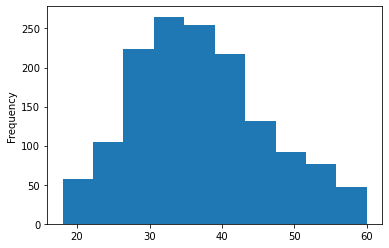

In [15]:
#Histogram of Age variable
df['Age'].plot.hist()

The above histogram is normally distributed.

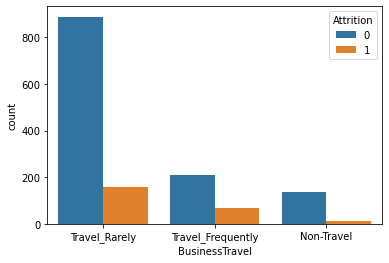

In [16]:
#Countplot of BusinessTravel based on Attrition
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)

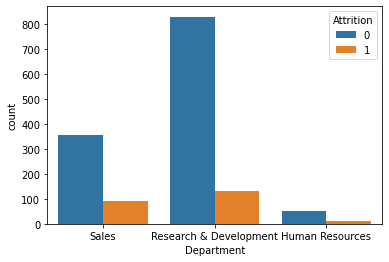

In [17]:
#Countplot of Department based on Attrition
sns.countplot(x='Department', hue='Attrition', data=df)

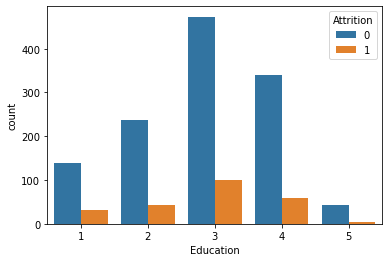

In [18]:
#Countplot of Education based on Attrition
sns.countplot(x='Education', hue='Attrition', data=df)

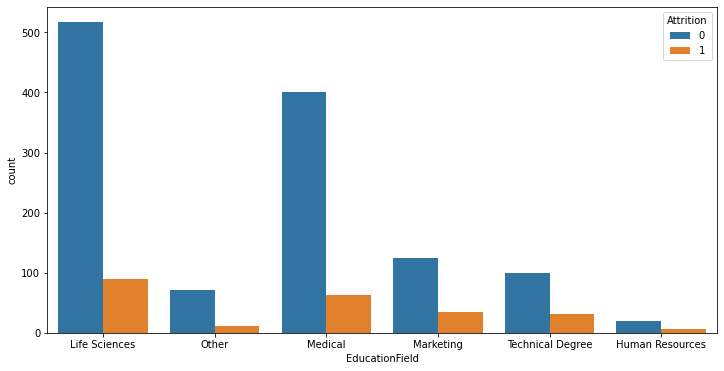

In [19]:
#Countplot of EducationField based on Attrition
plt.figure(figsize=(12, 6))
sns.countplot(df['EducationField'], hue='Attrition', data=df)
plt.show()

In [20]:
#Separating categorical variables and continuous variables
num_df = df[df.select_dtypes(include=np.number).columns.tolist()]
cat_df = df[df.select_dtypes(include='object').columns.tolist()]

In [21]:
#First 5 rows of numerical dataframe
num_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2


In [22]:
#First 5 rows of categorical dataframe
cat_df.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [23]:
#Creating dummy variables from all categorical columns
dummy_df = pd.get_dummies(cat_df)

In [24]:
#First 5 rows of dummy dataframe
dummy_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [25]:
#Merge numerical dataframe and dummy dataframe
df = pd.concat([num_df, dummy_df], axis=1)

In [26]:
#First 5 rows of the dataframe
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,1,0,0,0,1,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,1,0,0,0,1,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,0,1,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,1,0,0,0,1,0,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,1,0


In [27]:
#Separating Independent variable and Dependent variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [28]:
#Creating a Train set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

In [29]:
#Dimension of Train and Test dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 51), (294, 51), (1176,), (294,))

### Implement Random Forest

In [30]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Creating an instance of RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

#Training a model to the Train set
rf.fit(X_train, y_train)

#Make a prediction for Test set
y_pred = rf.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


### Evaluate a model

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy  : ", accuracy_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))
print("Recall    : ", recall_score(y_test, y_pred))

Accuracy  :  0.8605442176870748
Precision :  0.7142857142857143
Recall    :  0.2127659574468085


We can see that only with 100 trees we got significant increase in Accuracy and Precision, where we compromised on Recall.

### Now let us do tuning by 2 ways
1. Random Search
2. Grid Search

### Random Search

In [32]:
from time import time
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

#Utility function to report best_scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank : {0}".format(i))
            print("Mean Validation Score : {0:.3f} (std : {1:.3f})".format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print('Parameters : {0}'.format(results['params'][candidate]))
            print()
            
#Specify parameters and distributions to sample from 
param_dist = {'max_depth' : [3, None],
             'max_features' : randint(1, 11),
             'min_samples_split' : randint(2, 11),
             'bootstrap' : [True, False],
             'criterion' : ['gini', 'entropy']}

#Run RandomizedSearch
n_iter_search = 20
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=n_iter_search, cv=5)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 24.75 seconds for 20 candidates parameter settings.
Model with rank : 1
Mean Validation Score : 0.865 (std : 0.010)
Parameters : {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_split': 4}

Model with rank : 2
Mean Validation Score : 0.862 (std : 0.008)
Parameters : {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 10}

Model with rank : 3
Mean Validation Score : 0.858 (std : 0.011)
Parameters : {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_split': 4}



### Grid Search

In [33]:
#Use a full grid over all parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : [3, None],
             'max_features' : [1, 3, 5, 10],
             'min_samples_split' : [2, 3, 10],
             'bootstrap' : [True, False],
             'criterion' : ['gini', 'entropy']}

#Run Grid Search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X_train, y_train)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

GridSearchCV took 109.25 seconds for 96 candidate parameter settings.
Model with rank : 1
Mean Validation Score : 0.865 (std : 0.008)
Parameters : {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_split': 3}

Model with rank : 1
Mean Validation Score : 0.865 (std : 0.012)
Parameters : {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_split': 10}

Model with rank : 3
Mean Validation Score : 0.864 (std : 0.011)
Parameters : {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 3}



### RandomizedSearchCV took 23.91 seconds for 20 candidates parameter settings.
Mean Validation Score : 0.863 (std : 0.010)<br><br>
Parameters : {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 7, 'min_samples_split': 7}

### GridSearchCV took 108.71 seconds for 96 candidate parameter settings.
Mean Validation Score : 0.865 (std : 0.007)<br><br>
Parameters : {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 3}

**Here we have left many paramenters of the grid and we can also tune them.<br><br>
This is how we tune the random forest, now you have to look for a way where you can give your own metrics to run grid search.**
<br><br>We can see that we are now getting 87% Mean Validation Score so its a good model to use.

In [34]:
#Now run the Random Forest with the best parameters of Random Search

#Build a classfier with best of Random Search
rf_random_search = RandomForestClassifier(n_estimators=100, bootstrap=True, criterion='gini', max_features=10, 
                                         min_samples_split=10)

#Train a model using Training set
rf_random_search.fit(X_train, y_train)

#Make a prediction
y_pred = rf_random_search.predict(X_test)

In [35]:
#Evaluate a model
print("Accuracy   : ", accuracy_score(y_test, y_pred))
print("Precision  : ", precision_score(y_test, y_pred))
print("Recall     : ", recall_score(y_test, y_pred))

Accuracy   :  0.8605442176870748
Precision  :  0.7142857142857143
Recall     :  0.2127659574468085


In [36]:
#Now run the Random Forest with the best parameters of Grid Search

#Build a classifier with best of Grid Search
rf_grid_search = RandomForestClassifier(n_estimators=100, bootstrap=False, criterion='gini', max_features=10, 
                                       min_samples_split=2)

#Train a model using Training set
rf_grid_search.fit(X_train, y_train)

#Make a prediction
y_pred = rf_grid_search.predict(X_test)

In [37]:
#Evaluate a model
print("Accuracy   : ", accuracy_score(y_test, y_pred))
print("Precision  : ", precision_score(y_test, y_pred))
print("Recall     : ", recall_score(y_test, y_pred))

Accuracy   :  0.8605442176870748
Precision  :  0.6666666666666666
Recall     :  0.2553191489361702


### Comparing Results of Grid and Random Search

#### Simple Random Forest

Accuracy  :  0.8605442176870748<br>
Precision :  0.7142857142857143<br>
Recall    :  0.2127659574468085<br>

#### Random Search

Accuracy   :  0.8605442176870748<br>
Precision  :  0.7142857142857143<br>
Recall     :  0.2127659574468085<br>

#### Grid Search

Accuracy   :  0.8605442176870748<br>
Precision  :  0.6666666666666666<br>
Recall     :  0.2553191489361702<br>